## Logistic Regression: Iris Dataset

Bronwyn Bowles-King

### Introduction

In this notebook, I will develop a classifier (Model 1) with logistic regression to determine whether a given iris flower belongs to the *Iris setosa* species using binary classification. The classification is based on 150 sets of measurements of iris petals and sepals (green leafy parts below the petals) from Fisher's (1936) well-known botanical dataset. 

After using binary classification, I will create a classifier to distinguish between the three species *Iris setosa*, *Iris versicolor* and *Iris virginica* (Model 2) in the dataset and then refine the model by changing the amount of training data used to make it more accurate (Model 3). This exercise shows whether and to what extent we can distinguish between these plant species based on the size of their flower structures alone and how much training data is needed for the most accurate results. Accuracy, recall and precision scores are also calculated to show the different model's effectiveness. 

Logistic regression is surprisingly simple yet effective. The way it works will be explained first before beginning the steps involved.

#### How logistic regression works

With binary logistic regression, there are two possible outcomes (e.g., the likelihood of developing cancer or not). Nominal logistic regression is used for three or more categories with no natural ordering or levels (multinomial) (e.g., distinguishing between animal species). Ordinal logistic regression is applied when three or more categories with a natural ordering or levels are involved (e.g. Likert-scale feedback) (Pennsylvania State University, 2018).

#### Logistic regression process 

* The model receives a set of measurements or observations for the categories that the model must distinguish between.

* The weighted sum of the inputs is calculated.

* The sigmoid function (binary classification), softmax function (nominal logistic regression), or proportional odds (ordinal logistic regression) are usually applied to get probabilities for each class. If the result is more than the threshold of 0.5 for a certain category in the case of binary classification, the model assigns the instance to that category. The model thus chooses the category with the highest probability as the predicted category. For multiclass classification, the softmax or proportional odds function calculates a probability distribution for all categories and the highest result is selected.

* When the results are equal, such as 0.5 for both categories in binary classification, the option with the lowest index is selected by default, which is generally 0. This is a weakness of the method, as the results could be skewed towards one category. However, with large and real-life samples, ties are rare and there are various ways to avoid or handle them if they do occur (HyperionDev, 2025; Blancas, 2022).

### 1. Import libraries and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score

df = pd.read_csv("Iris.csv")

### 2. Identify dependent and independent variables for Model 1

The independent variables or features (X) for this classification task are all the columns except the index and the target variable 'Species'. In the dataset, these are:

* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm

To encode the dependent variable y, I will use the following:

* Iris-setosa = 0
* Iris-versicolor and Iris-virginica = 1

This is done by applying a function to create a new column 'y' below.

In [2]:
df['y'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

### 3. Split the data into training and test sets

The data is split into 75% training data (112 samples) and 25% test data, so that Model 1 will predict the species for 38 samples after being run.

In [3]:
X = df.drop(columns=['Species', 'y', 'Id'])
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4. Fit the logistic regression model, make predictions, and create a confusion matrix

The confusion matrix below in Figure 1 shows that the logistic regression model predicts *Iris setosa* in 15 cases and the other two species are identified as not being *Iris setosa* in 23 cases. All these predictions are correct. 

Model 1 is thus successful and will show a perfect score for recall and precision, as will be demonstrated in section 5. We can also see that a 75:25 training versus test data split is suitable for this binary model.

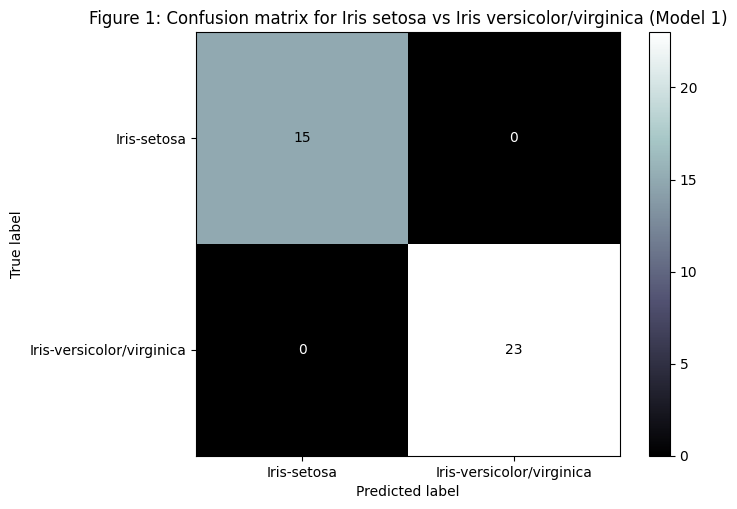

In [4]:
model_1 = LogisticRegression(random_state=42)
model_1.fit(x_train, y_train)
y_predict = model_1.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0,1])

display_labels = ['Iris-setosa', 'Iris-versicolor/virginica']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(7.5, 5.5))
ax.set_title('Figure 1: Confusion matrix for Iris setosa vs Iris versicolor/virginica (Model 1)')
disp.plot(cmap='bone', ax=ax)
plt.show()

From the results below, we can also see that there is a clear difference between the probabilities assigned for each class. For example, in the first row [0], the probability for *Iris setosa* (0) is very low (~0.005) and for *Iris versicolor* and *Iris virginica* together (1), it is almost perfect (~0.995). We can be fairly certain this flower is not an *Iris setosa*. The actual and predicted outcomes confirm this and the model's success in predicting it.  

In [5]:
proba = model_1.predict_proba(x_test)
proba_df = pd.DataFrame(proba, columns=model_1.classes_)
proba_df['actual'] = y_test.values
proba_df['predicted'] = model_1.predict(x_test)
print(proba_df.head())

          0         1  actual  predicted
0  0.004731  0.995269       1          1
1  0.955317  0.044683       0          0
2  0.000006  0.999994       1          1
3  0.006324  0.993676       1          1
4  0.002376  0.997624       1          1


### 5. Calculate accuracy, precision and recall scores and compare with sklearn functions

#### 5.1 Accuracy

The accuracy metric calculates the fraction of predictions the model was correct about, focusing on the True Positive and True Negative instances compared to all the results. The accuracy formula is:

$ {Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $


Where:

* TP = True positive (correct prediction)
* TN = True negative (correct prediction)
* FP = False positive (incorrect prediction)
* FN = False negative (incorrect prediction)

For Model 1, the values are:

* TP = 15
* TN = 23
* FP = 0
* FN = 0

Because the model predicted all instances correctly, the answer is:

$ {Accuracy} = \frac{15 + 23}{15 + 23 + 0 + 0}  = \frac{38}{38} = 1$

Although we can work this out quite simply with the above formula in this case, I will create a function to do this, which will be useful for larger samples and complex cases. To ensure the function is correct, the results will be checked against sklearn's accuracy score function.

A helper function is created, `confusion_values`, in which the first line of code calculates TP as follows: 

* `zip(y_test, y_predict)` pairs each **actual label** (`a` from **y_test**) with its corresponding **predicted label** (`p` from **y_predict**). 
  
* The for loop `for a, p in` goes through each pair of actual and predicted labels. 
  
* The if statement `if a == p == positive_label` checks if both the actual and predicted label are the same as the value for positive_label, which is 0.
  
* For every pair where the if statement is true, it adds 1 to the total using `sum(...)`. 

This essentially counts TP cases where the model correctly predicts the positive class. The rest of the function follows a similar process to calculate TN, FP and FN. The main function `calculate_accuracy` then uses the output from `confusion_values` to determine the accuracy rate.

After the functions are run, sklearn's function `accuracy_score` is run to verify the results. This process will be repeated for the precision and recall scores.

In [6]:
def confusion_values(y_test, y_predict, positive_label=0):

    '''Extract values from the confusion matrix for use in calculating accuracy.'''

    TP = sum(1 for a, p in zip(y_test, y_predict) if a == p == positive_label)
    TN = sum(1 for a, p in zip(y_test, y_predict) if a == p and a != positive_label)
    FP = sum(1 for a, p in zip(y_test, y_predict) if a != positive_label and p == positive_label)
    FN = sum(1 for a, p in zip(y_test, y_predict) if a == positive_label and p != positive_label)
    return TP, TN, FP, FN


def calculate_accuracy(TP, TN, FP, FN):

    '''Calculate accuracy metric for logistic prediction model using input from 
    confusion_values.'''

    return (TP + TN) / (TP + TN + FP + FN)


TP, TN, FP, FN = confusion_values(y_test, y_predict, positive_label=0)
accuracy = calculate_accuracy(TP, TN, FP, FN)
print('Model 1 prediction accuracy (own function):', accuracy)

skl_accuracy = accuracy_score(y_test, y_predict)
print('Model 1 prediction accuracy (sklearn function):', skl_accuracy)

Model 1 prediction accuracy (own function): 1.0
Model 1 prediction accuracy (sklearn function): 1.0


#### 5.2 Precision

Precision is a measure of how well the model was able to make predictions correctly, focusing on the True Positive instances compared to False Positives specifically. The precision formula is:

$ {Precision} = \frac{TP}{TP + FP} $

Because the model predicted all instances correctly, the answer is:

$ {Precision} = \frac{15}{15 + 0}  = \frac{15}{15} = 1$

The function below calculates the precision metric. After the function is run, sklearn's `precision_score` is used for verification, which provides the same result.

In [7]:
def calculate_precision(y_test, y_predict, positive_label=0):

    '''Calculate precision for logistic prediction model.'''
     
    TP = sum(1 for a, p in zip(y_test, y_predict) if a == p == positive_label)
    FP = sum(1 for a, p in zip(y_test, y_predict) if a != positive_label and p == positive_label)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    return precision


precision_value = calculate_precision(y_test, y_predict, positive_label=0)
print('Model 1 prediction precision (own function):', precision_value)

skl_precision = precision_score(y_test, y_predict, pos_label=0)
print('Model 1 prediction precision (sklearn function):', skl_precision)

Model 1 prediction precision (own function): 1.0
Model 1 prediction precision (sklearn function): 1.0


#### 5.3 Recall

Recall is a measure of how many times the model was able to make predictions correctly, focusing on the True Positive instances compared to False Negatives specifically. The recall formula is:

$ {Recall} = \frac{TP}{TP + FN} $

Because the model predicted all instances correctly, the answer is:

$ {Recall} = \frac{15}{15 + 0}  = \frac{15}{15} = 1$

The function below calculates the recall for the current model. After the function is run, sklearn's `recall_score` is used for verification, which provides the same result.

In [8]:
def calculate_recall(y_test, y_predict, positive_label=0):

    '''Calculate recall metric for logistic prediction model.'''
     
    TP = sum(1 for a, p in zip(y_test, y_predict) if a == p == positive_label)
    FN = sum(1 for a, p in zip(y_test, y_predict) if a == positive_label and p != positive_label)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return recall


recall_value = calculate_recall(y_test, y_predict, positive_label=0)
print('Model 1 prediction recall (own function):', recall_value)

skl_recall = recall_score(y_test, y_predict, pos_label=0)
print('Model 1 prediction recall (sklearn function):', skl_recall)

Model 1 prediction recall (own function): 1.0
Model 1 prediction recall (sklearn function): 1.0


### 6. Repeat the process for all species of iris in the dataset 

#### 6.1 Model 2 - 75:25 data split

I will now create a classifier to distinguish between all three species of iris in the dataset based on the size of their flower structures and determine the extent to which it is successful. 

From Figure 2 below, we can see that Model 2 has performed fairly well overall because it has only made two errors out of 38 samples in predicting between *Iris versicolor* and *Iris virginica* with 75% training data. The model makes no errors in distinguising *Iris setosa* from the other species.

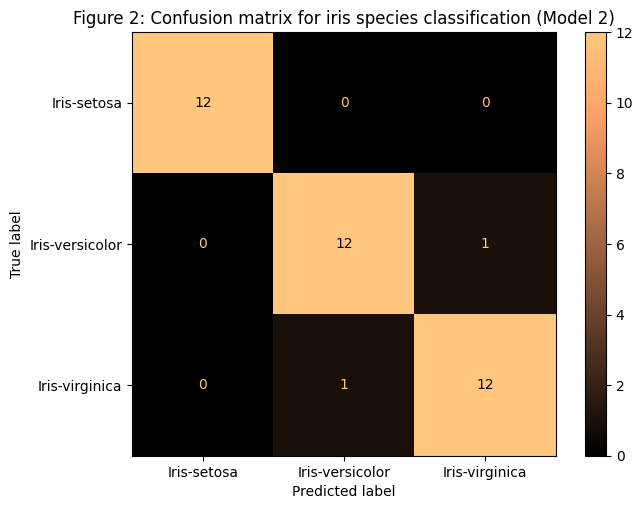

In [9]:
df_2 = df.drop(columns=['Id'])

# Encode species 0-2
df_2['Species_encoded'], species_names = pd.factorize(df_2['Species'])

# Specify X and y
X_2 = df_2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_2 = df_2['Species_encoded']

# Create, train and fit model with 75:25 training and test data split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42, stratify=y_2)
model_2 = LogisticRegression(solver='lbfgs', max_iter=200)
model_2.fit(x_train2, y_train2)

# Make predictions
y_predict2 = model_2.predict(x_test2)

# Create confusion matrix and plot
cm_2 = confusion_matrix(y_test2, y_predict2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=species_names)
fig, ax = plt.subplots(figsize=(7.5, 5.5))
disp_2.plot(cmap='copper', ax=ax)
ax.set_title('Figure 2: Confusion matrix for iris species classification (Model 2)')
plt.show()

#### 6.2 Model 3 - 80:20 data split

If the training data is increased to 80%, Model 3 makes only one error in distinguishing between *Iris versicolor* and *Iris virginica*, as shown in Figure 3. As before, Model 3 makes no errors in distinguishing *Iris setosa* from the other species. 

If more training data was available and more variables were included, we could likely get this up to 100% accuracy. This shows that with more possible categories, more training data is likely needed.

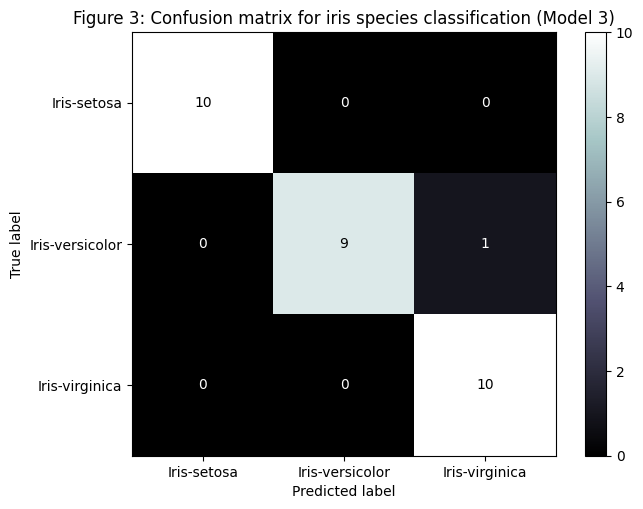

In [10]:
X_3 = df_2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_3 = df_2['Species_encoded']

x_train3, x_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42, stratify=y_2)
model_3 = LogisticRegression(solver='lbfgs', max_iter=200)
model_3.fit(x_train3, y_train3)
y_predict3 = model_3.predict(x_test3)

cm_3 = confusion_matrix(y_test3, y_predict3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=species_names)
fig, ax = plt.subplots(figsize=(7.5, 5.5))
disp_3.plot(cmap='bone', ax=ax)
ax.set_title('Figure 3: Confusion matrix for iris species classification (Model 3)')
plt.show()

#### 6.3 Model 2 and 3 accuracy, precision and recall scores

The accuracy, precision and recall scores are calculated for Model 2 and 3 using the sklearn functions as this is quicker. These high evaluation metric values are due to the models consistently predicting *Iris setosa* correctly each time and the low level of false positives in predicting *Iris versicolor* and *Iris virginica*.

In [ ]:
skl_accuracy_2 = accuracy_score(y_test2, y_predict2)
print('Model 2 prediction accuracy (sklearn function):', round(skl_accuracy_2, 2))

skl_precision_2 = precision_score(y_test2, y_predict2, average='weighted')
print('Model 2 prediction precision (sklearn function):', round(skl_precision_2, 2))

skl_recall_2 = recall_score(y_test2, y_predict2, average='weighted')
print('Model 2 prediction recall (sklearn function):', round(skl_recall_2, 2))

skl_accuracy_3 = accuracy_score(y_test3, y_predict3)
print('\nModel 3 prediction accuracy (sklearn function):', round(skl_accuracy_3, 2))

skl_precision_3 = precision_score(y_test3, y_predict3, average='weighted')
print('Model 3 prediction precision (sklearn function):', round(skl_precision_3, 2))

skl_recall_3 = recall_score(y_test3, y_predict3, average='weighted')
print('Model 3 prediction recall (sklearn function):', round(skl_recall_3, 2))


Model 2 prediction accuracy (sklearn function): 0.95
Model 2 prediction precision (sklearn function): 0.95
Model 2 prediction recall (sklearn function): 0.95

Model 3 prediction accuracy (sklearn function): 0.97
Model 3 prediction precision (sklearn function): 0.97
Model 3 prediction recall (sklearn function): 0.97


#### 7. Conclusion

In the end, Model 1, a binary classifier using a training and test data split of 75:25, has accuracy, precision and recall rates all equal to 1. For Model 2, which has three categories (three iris species) and uses a training and test data split of 75:25, they are all equal to 0.95. For Model 3, which also has three possible categories but uses a training and test data split of 80:20, they are all 0.97. 

These results show how logistic regression can be effective for classifying iris species based on simple measurements, and the same may be true for some other species of flowers and many other classes of objects with unique measurable variables. The improvement in accuracy from Model 2 to Model 3 highlights the benefit of using a larger training set, but more data would be useful to improve the model. 

#### References

Blancas, E. (2022). Stop Using 0.5 as the Threshold for Your Binary Classifier. Medium. https://medium.com/data-science/stop-using-0-5-as-the-threshold-for-your-binary-classifier-8d7168290d44

Fisher, R. (1936). Iris Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76

Geeks for Geeks. (2025). How to Plot Confusion Matrix with Labels in Sklearn? https://www.geeksforgeeks.org/machine-learning/how-to-plot-confusion-matrix-with-labels-in-sklearn

Geeks for Geeks. (2025). Using apply in pandas lambda functions with multiple if statements. https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements

HyperionDev. (2025). Supervised Learning – Logistic Regression. Course materials. Private repository, GitHub.

Kawahara, J. (2016). How to compute true/false positives and true/false negatives. GitHub. https://github.com/jeremykawahara/tutorials/blob/master/how_to_compute_true_false_positivies_and_true_false_negatives.ipynb

Leung, K. (2021). Assumptions of Logistic Regression, Clearly Explained. Towards Data Science. https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290

pandas. (2025). pandas.factorize. https://pandas.pydata.org/docs/reference/api/pandas.factorize.html

Pandey, R. (2020). Logistic Regression From Scratch Iris Data-set. Kaggle. https://www.kaggle.com/code/rahulrajpandey31/logistic-regression-from-scratch-iris-data-set

Pennsylvania State University. (2018). 12.1 Logistic Regression. https://online.stat.psu.edu/stat462/node/207/

scikit-learn. (2024a). LogisticRegression. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

scikit-learn. (2024b). sklearn.metrics. https://scikit-learn.org/stable/api/sklearn.metrics.html

scikit-learn. (2024c). ConfusionMatrixDisplay. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

scikit-learn. (2024d). confusion_matrix. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

scikit-learn. (2024e). train_test_split. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Solomon, B. (n.d.). Python Plotting With Matplotlib (Guide). Real Python. https://realpython.com/python-matplotlib-guide

StackOverflow. (2020). R Markdown Inline LaTeX Equations. https://stackoverflow.com/questions/62917217/r-markdown-inline-latex-equations-vs